<a href="https://colab.research.google.com/github/NSR9/EVA4/blob/master/Q9/Q9Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())


Current Date/Time:  2020-05-30 14:19:56.855699


In [2]:
#importing python dependencies
from __future__ import print_function
import numpy as np
import sys

#importing Pytorch packages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR

# Importing torch summary
!pip install torchsummary
from torchsummary import summary

#importing albumentations for datatransformation\
!pip install albumentations


#Importing matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Importing google drive colab package to load files
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to our library in default search path
sys.path.append('/content/drive/My Drive/Q9')

In [5]:
#importing python modules
import ViewData
import Dataloaders1
import Albumentations

import QuizDNN as models # drive

import execute # this is to train & test the model
import data_transform as dt#import data_transform


Files already downloaded and verified
Files already downloaded and verified


In [6]:
# trainloader and testloader defined and loaded
tl = dt.DataTransformandLoad()
channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
trainloader, testloader = tl.TransformAndLoad(mean1 = channel_means,stdev1 = channel_stdevs)




Files already downloaded and verified
Files already downloaded and verified


truck   cat  bird   dog


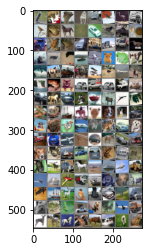

In [7]:
# let us view some training images
ViewData.getTrainImages()

In [8]:
# Model Summary

#using GPU 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#creating a model
#model =  rsnet.ResNet18().to(device)
model = models.MyNet(False).to(device)
# View summary of the model
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 30, 30]           4,608
              ReLU-6           [-1, 32, 30, 30]               0
       BatchNorm2d-7           [-1, 32, 30, 30]              64
           Dropout-8           [-1, 32, 30, 30]               0
         MaxPool2d-9           [-1, 32, 15, 15]               0
           Conv2d-10           [-1, 16, 17, 17]             512
             ReLU-11           [-1, 16, 17, 17]               0
      BatchNorm2d-12           [-1, 16, 17, 17]              32
          Dropout-13           [-1, 16, 17, 17]               0
           Conv2d-14           [-1

In [9]:
#creating model1 to import test and train modules
model1 = execute.Test_Train()

#defining optimizer and scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=15)

#Running the Epochs
EPOCHS = 15
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler)
  model1.test(model, device, testloader,"model.pt")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.2265912294387817 Batch_id=390 Accuracy=42.12: 100%|██████████| 391/391 [00:16<00:00, 23.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0102).  Saving model ...

Test set: Average loss: 0.0102, Accuracy: 5341/10000 (53.41%)

EPOCH: 2


Loss=1.0275284051895142 Batch_id=390 Accuracy=59.96: 100%|██████████| 391/391 [00:16<00:00, 23.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0102 --> 0.0079).  Saving model ...

Test set: Average loss: 0.0079, Accuracy: 6392/10000 (63.92%)

EPOCH: 3


Loss=0.7819522619247437 Batch_id=390 Accuracy=67.26: 100%|██████████| 391/391 [00:16<00:00, 23.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0079 --> 0.0066).  Saving model ...

Test set: Average loss: 0.0066, Accuracy: 7074/10000 (70.74%)

EPOCH: 4


Loss=0.7840371131896973 Batch_id=390 Accuracy=72.06: 100%|██████████| 391/391 [00:16<00:00, 23.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0066 --> 0.0065).  Saving model ...

Test set: Average loss: 0.0065, Accuracy: 7119/10000 (71.19%)

EPOCH: 5


Loss=0.6185079216957092 Batch_id=390 Accuracy=74.54: 100%|██████████| 391/391 [00:16<00:00, 23.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0065 --> 0.0056).  Saving model ...

Test set: Average loss: 0.0056, Accuracy: 7527/10000 (75.27%)

EPOCH: 6


Loss=0.8534653782844543 Batch_id=390 Accuracy=76.18: 100%|██████████| 391/391 [00:16<00:00, 23.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0056 --> 0.0055).  Saving model ...

Test set: Average loss: 0.0055, Accuracy: 7581/10000 (75.81%)

EPOCH: 7


Loss=0.5406699776649475 Batch_id=390 Accuracy=77.75: 100%|██████████| 391/391 [00:16<00:00, 23.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0055 --> 0.0052).  Saving model ...

Test set: Average loss: 0.0052, Accuracy: 7720/10000 (77.20%)

EPOCH: 8


Loss=0.45871347188949585 Batch_id=390 Accuracy=79.01: 100%|██████████| 391/391 [00:16<00:00, 23.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0052 --> 0.0047).  Saving model ...

Test set: Average loss: 0.0047, Accuracy: 7991/10000 (79.91%)

EPOCH: 9


Loss=0.49845847487449646 Batch_id=390 Accuracy=79.89: 100%|██████████| 391/391 [00:16<00:00, 23.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7927/10000 (79.27%)

EPOCH: 10


Loss=0.5558555722236633 Batch_id=390 Accuracy=80.83: 100%|██████████| 391/391 [00:17<00:00, 22.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0047 --> 0.0046).  Saving model ...

Test set: Average loss: 0.0046, Accuracy: 8025/10000 (80.25%)

EPOCH: 11


Loss=0.5624224543571472 Batch_id=390 Accuracy=81.91: 100%|██████████| 391/391 [00:17<00:00, 22.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0046 --> 0.0045).  Saving model ...

Test set: Average loss: 0.0045, Accuracy: 8059/10000 (80.59%)

EPOCH: 12


Loss=0.39004677534103394 Batch_id=390 Accuracy=83.03: 100%|██████████| 391/391 [00:16<00:00, 23.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0045 --> 0.0043).  Saving model ...

Test set: Average loss: 0.0043, Accuracy: 8129/10000 (81.29%)

EPOCH: 13


Loss=0.534584641456604 Batch_id=390 Accuracy=84.02: 100%|██████████| 391/391 [00:17<00:00, 22.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0043 --> 0.0041).  Saving model ...

Test set: Average loss: 0.0041, Accuracy: 8180/10000 (81.80%)

EPOCH: 14


Loss=0.5486356019973755 Batch_id=390 Accuracy=84.84: 100%|██████████| 391/391 [00:16<00:00, 23.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0041 --> 0.0040).  Saving model ...

Test set: Average loss: 0.0040, Accuracy: 8258/10000 (82.58%)

EPOCH: 15


Loss=0.42798203229904175 Batch_id=390 Accuracy=85.50: 100%|██████████| 391/391 [00:16<00:00, 23.16it/s]



Test set: Average loss: 0.0040, Accuracy: 8263/10000 (82.63%)

